In [6]:
# pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

In [7]:
df = pd.read_csv('../Data/epsPQRS.csv', sep=';')

In [8]:
df.head(n=5)

,Comentario,Area
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Oportunidad Citas Red Contratada
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas


In [9]:
print(df.shape)
print(pd.value_counts(df['Area'], sort = True))

(82778, 2)
Oportunidad Citas Red Contratada                  35522
No Suministro Medicamentos                        14254
Dificultad Accesibilidad Administrativa           10035
Inconsistencias Sistemas De InformacionAsegura     5861
Solicitudes Web                                    4956
Negación De ServiciosDificultad MédicoAdmin        4227
Dificultad Tutelas                                 2413
Negación De Servicios                              2348
Incumplimiento Portabilidad Nacional                878
Problemas Recursos Economicos                       473
Atención Deshumanizada                              413
Exclusiones Usuarios Sin Tutela                     380
Dificultad Alto Costo                               373
Prestaciones Economicas                             328
Presunto Evento AdversoSeguridadPertinencia         142
Presunto Evento Adverso SeguridadPertinencia         85
Servicio Al Cliente                                  63
Administrativa                       

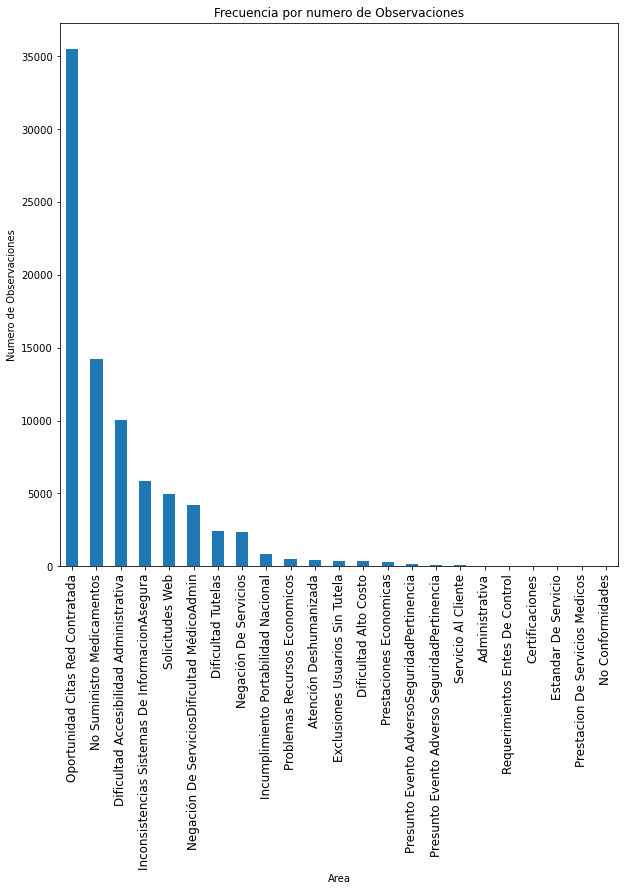

In [20]:
fig, ax = plt.subplots(figsize = (10, 10))
count_classes = pd.value_counts(df['Area'], sort = True)
count_classes.plot(kind = 'bar', rot=0, ax=ax)
plt.xticks(rotation=90, fontsize=12)
plt.title("Frecuencia por numero de Observaciones")
plt.xlabel("Area")
plt.ylabel("Numero de Observaciones");

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [29]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
stopwords_sp = stopwords.words('spanish')

In [30]:
stopwords_sp.extend(["pqrd", "entidad", "nurc", "dia", "capital", "salud","bogotá"])
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [31]:
X_train = tfidf_vect.fit_transform(train.Comentario.values)
y_train = train.Area.values

In [32]:
X_test = tfidf_vect.transform(test.Comentario.values)
y_test = test.Area.values

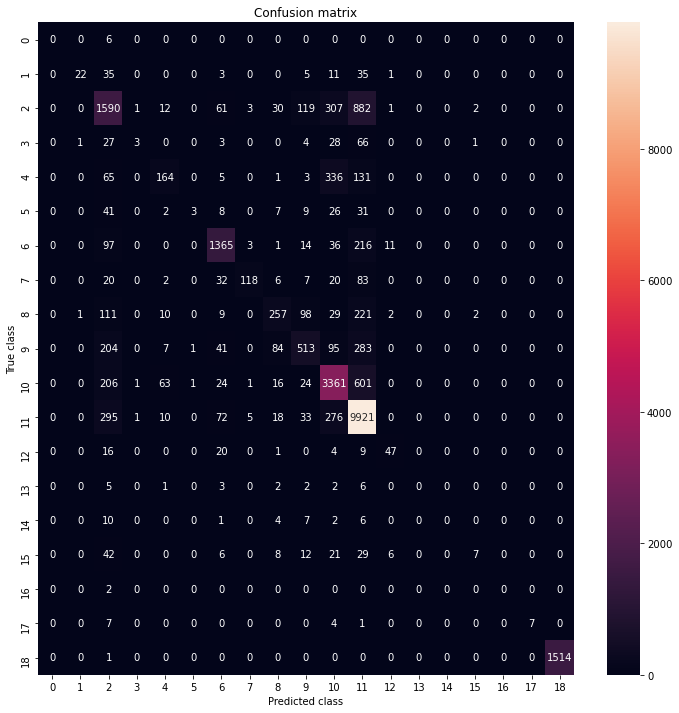

C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         6
                        Atención Deshumanizada       0.92      0.20      0.32       112
       Dificultad Accesibilidad Administrativa       0.57      0.53      0.55      3008
                         Dificultad Alto Costo       0.50      0.02      0.04       133
                            Dificultad Tutelas       0.61      0.23      0.34       705
               Exclusiones Usuarios Sin Tutela       0.60      0.02      0.05       127
Inconsistencias Sistemas De InformacionAsegura       0.83      0.78      0.80      1743
          Incumplimiento Portabilidad Nacional       0.91      0.41      0.56       288
                         Negación De Servicios       0.59      0.35      0.44       740
   Negación De ServiciosDificultad MédicoAdmin       0.60      0.42      0.49      1228
                    No Suminist

C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#definimos nuestras etiquetas y features
y = df['Area']
X = df.drop('Area', axis=1)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d"); # xticklabels=LABELS, yticklabels=LABELS
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

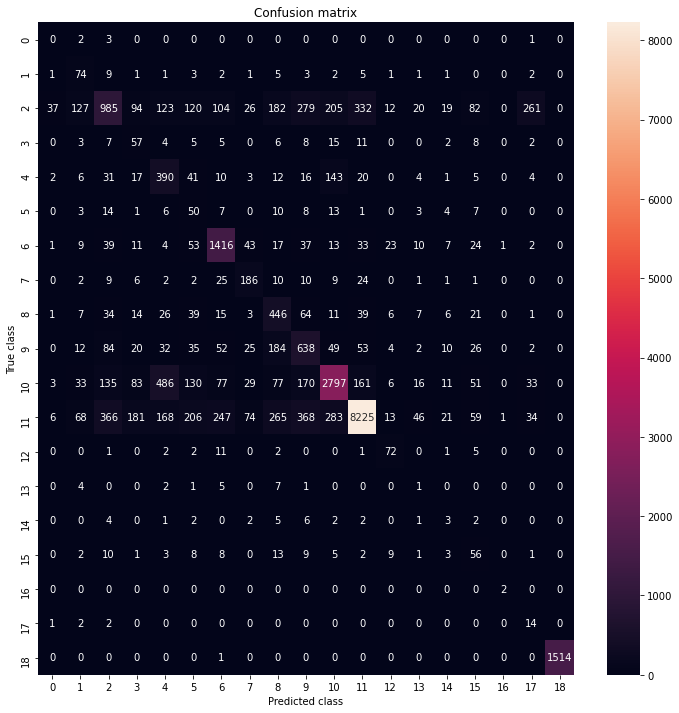

                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         6
                        Atención Deshumanizada       0.21      0.66      0.32       112
       Dificultad Accesibilidad Administrativa       0.57      0.33      0.42      3008
                         Dificultad Alto Costo       0.12      0.43      0.18       133
                            Dificultad Tutelas       0.31      0.55      0.40       705
               Exclusiones Usuarios Sin Tutela       0.07      0.39      0.12       127
Inconsistencias Sistemas De InformacionAsegura       0.71      0.81      0.76      1743
          Incumplimiento Portabilidad Nacional       0.47      0.65      0.55       288
                         Negación De Servicios       0.36      0.60      0.45       740
   Negación De ServiciosDificultad MédicoAdmin       0.39      0.52      0.45      1228
                    No Suminist

In [34]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [57]:
us = NearMiss(sampling_strategy={}, n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)


Distribution before resampling Counter({'Oportunidad Citas Red Contratada': 24891, 'No Suministro Medicamentos': 9956, 'Dificultad Accesibilidad Administrativa': 7027, 'Inconsistencias Sistemas De InformacionAsegura': 4118, 'Solicitudes Web': 3441, 'Negación De ServiciosDificultad MédicoAdmin': 2999, 'Dificultad Tutelas': 1708, 'Negación De Servicios': 1608, 'Incumplimiento Portabilidad Nacional': 590, 'Problemas Recursos Economicos': 342, 'Atención Deshumanizada': 301, 'Exclusiones Usuarios Sin Tutela': 253, 'Dificultad Alto Costo': 240, 'Prestaciones Economicas': 231, 'Presunto Evento AdversoSeguridadPertinencia': 112, 'Presunto Evento Adverso SeguridadPertinencia': 64, 'Servicio Al Cliente': 44, 'Requerimientos Entes De Control': 8, 'Administrativa': 6, 'Certificaciones': 2, 'Estandar De Servicio': 1, 'Prestacion De Servicios Medicos': 1, 'No Conformidades': 1})
Distribution after resampling Counter({'Oportunidad Citas Red Contratada': 24891, 'No Suministro Medicamentos': 9956, 'Dif

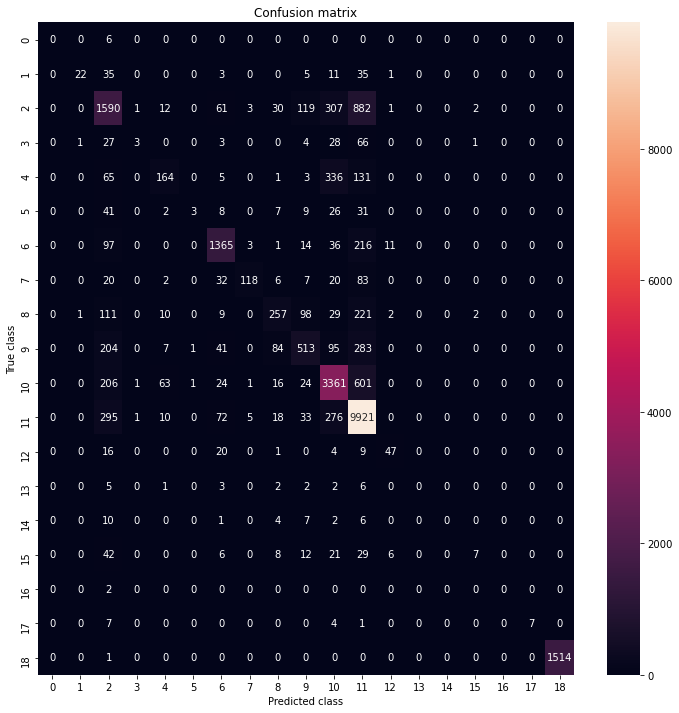

C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         6
                        Atención Deshumanizada       0.92      0.20      0.32       112
       Dificultad Accesibilidad Administrativa       0.57      0.53      0.55      3008
                         Dificultad Alto Costo       0.50      0.02      0.04       133
                            Dificultad Tutelas       0.61      0.23      0.34       705
               Exclusiones Usuarios Sin Tutela       0.60      0.02      0.05       127
Inconsistencias Sistemas De InformacionAsegura       0.83      0.78      0.80      1743
          Incumplimiento Portabilidad Nacional       0.91      0.41      0.56       288
                         Negación De Servicios       0.59      0.35      0.44       740
   Negación De ServiciosDificultad MédicoAdmin       0.60      0.42      0.49      1228
                    No Suminist

C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({'Oportunidad Citas Red Contratada': 24891, 'No Suministro Medicamentos': 9956, 'Dificultad Accesibilidad Administrativa': 7027, 'Inconsistencias Sistemas De InformacionAsegura': 4118, 'Solicitudes Web': 3441, 'Negación De ServiciosDificultad MédicoAdmin': 2999, 'Dificultad Tutelas': 1708, 'Negación De Servicios': 1608, 'Incumplimiento Portabilidad Nacional': 590, 'Problemas Recursos Economicos': 342, 'Atención Deshumanizada': 301, 'Exclusiones Usuarios Sin Tutela': 253, 'Dificultad Alto Costo': 240, 'Prestaciones Economicas': 231, 'Presunto Evento AdversoSeguridadPertinencia': 112, 'Presunto Evento Adverso SeguridadPertinencia': 64, 'Servicio Al Cliente': 44, 'Requerimientos Entes De Control': 8, 'Administrativa': 6, 'Certificaciones': 2, 'Estandar De Servicio': 1, 'Prestacion De Servicios Medicos': 1, 'No Conformidades': 1})
Distribution labels after resampling Counter({'Dificultad Tutelas': 24891, 'Dificultad Accesibilidad Administrativa': 2489

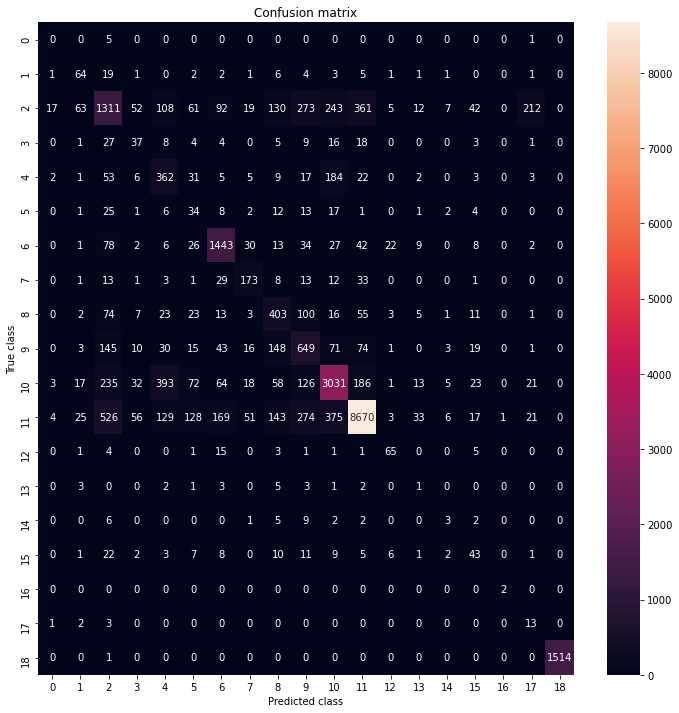

                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         6
                        Atención Deshumanizada       0.34      0.57      0.43       112
       Dificultad Accesibilidad Administrativa       0.51      0.44      0.47      3008
                         Dificultad Alto Costo       0.18      0.28      0.22       133
                            Dificultad Tutelas       0.34      0.51      0.41       705
               Exclusiones Usuarios Sin Tutela       0.08      0.27      0.13       127
Inconsistencias Sistemas De InformacionAsegura       0.76      0.83      0.79      1743
          Incumplimiento Portabilidad Nacional       0.54      0.60      0.57       288
                         Negación De Servicios       0.42      0.54      0.47       740
   Negación De ServiciosDificultad MédicoAdmin       0.42      0.53      0.47      1228
                    No Suminist

In [64]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)